In [1]:
import numpy
import matplotlib.pyplot as plt
import dataAnalysis as da

In [2]:
data1 = da.loadData("1.csv",[0,1,7]) # Load data collected from 13/02/2017 - 28/02/2017
data2 = da.loadData("2.csv",[0,1,7]) # Load data collected from 06/03/2017 - 21/03/2017

# Data

The following plots depicts two experimental campaigns that have been done two weeks from each other.
The first set of data (plot 1) depicts the execution time of AthenaMP for simulation of 100 events (~77 minutes). AthenaMP instances have been sent for execution on TITAN by using Radical Pilot with different pilot sizes: 200,500,1000 and 2000 nodes. The number of CUs per pilot was always equal to the number of nodes controlled by the pilot.
The second set of data (plot 2) depicts the execution time of AthenaMP for simulation of 16 events (~20 minutes). AthenaMP instances have been sent for execution on TITAN by using Radical Pilot with different pilot sizes: 256,512,1024 and 2048. The number of CUs per pilot was always equalt to five time the size of the pilot.

Note that the data do not include any overhead from RP. 



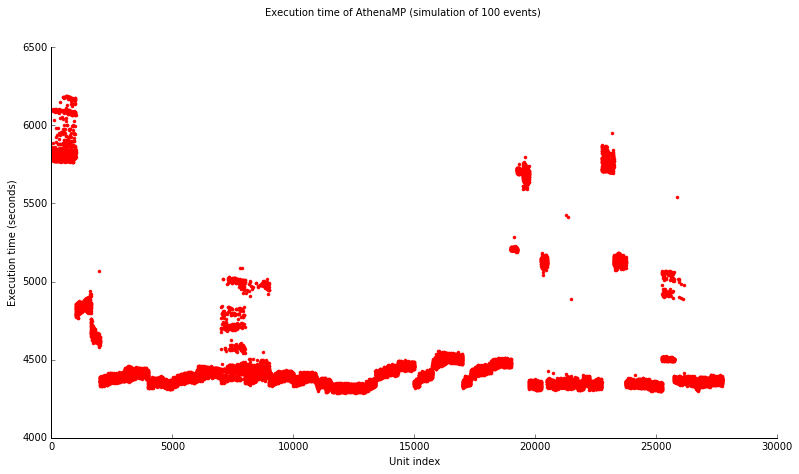

In [28]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

title='Execution time of AthenaMP (simulation of 100 events)'
fig.suptitle(title)

ax.plot(data1[0],data1[1],'.', color='red')

plt.xlabel('Unit index')
plt.ylabel('Execution time (seconds)')

plt.savefig('AthenaMP100Events.pdf', dpi=600, bbox_inches='tight')

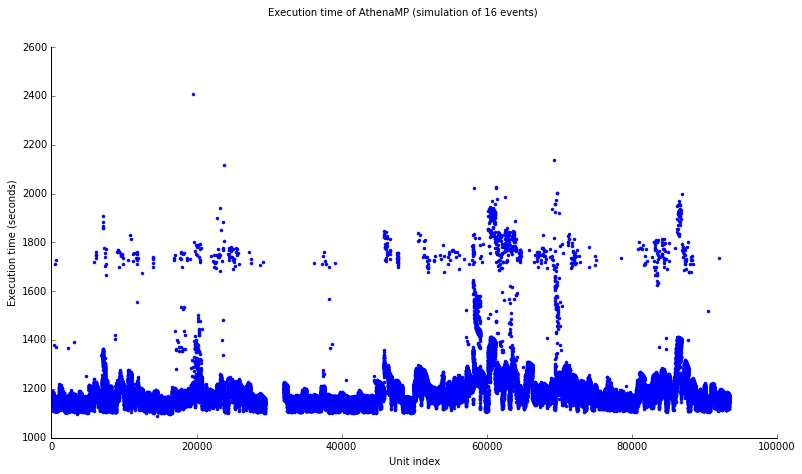

In [30]:
fig = plt.figure(figsize=(13,7))
ax = fig.add_subplot(111)  
ax.spines["top"].set_visible(False)  
ax.spines["right"].set_visible(False)  
ax.get_xaxis().tick_bottom()  
ax.get_yaxis().tick_left()

title='Execution time of AthenaMP (simulation of 16 events)'
fig.suptitle(title)

ax.plot(data2[0],data2[1],'.', color='blue')

plt.xlabel('Unit index')
plt.ylabel('Execution time (seconds)')

plt.savefig('AthenaMP16Events.pdf', dpi=600, bbox_inches='tight')

# Points of Discussion

No clue about the causes of these fluctuations. They are very different among each other.

1. Plot 1 : Fluctuations localized in very specific time instants.
2. Plot 2 : Fluctuations much rarer but random occurences 
3. Fluctuations are independent from the pilot size

# Possible Explanations

1. Titan's shared filesystem (Lustre). 
2. Database (MongoDB, used by RP for communication between components)

# Integration of TAU with RP (naive)

At least in principle (if I understood correctly), we can integrate TAU with RP by invoking ```tau.run``` with the name of the main in which RP is executed. Something like: 

```python

import tau
import radical.pilot as rp

def workloadExecution():

    #RP description of the workload
    

        
tau.run('workloadExecution()')
```

# Questions

1. Is this sufficient for a brief test of TAU with RP?
2. Is TAU able to follow all the threads that will be created by RP?
3. Is TAU able to track the CU on the computational nodes?
4. MongoDB is not in the list of the supported DBMS, is it possible to extend TAU in such a way that it works also with MongoDB
5. Is TAU able to perform post-mortem analysis?

